## Exploratory Data Analysis of Stock Market Data

## Imports


In [34]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
import seaborn as sns

##Load Data

In [9]:
df=pd.read_csv('TSLA.csv')

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


## Preprocess

###Column Names

In [12]:
df = df.copy()
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head() 

,date,open,high,low,close,adj_close,volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


## Exploratory Data Analysis

## Shape and Size

In [8]:
print(f'Dataframe Shape: {df.shape}')
print(f'Dataframe Size: {df.size}') 

Dataframe Shape: (3166, 7)
Dataframe Size: 22162


## Column datatypes

In [13]:
df.dtypes 

date          object
open         float64
high         float64
low          float64
close        float64
adj_close    float64
volume         int64
dtype: object

## Info and Description


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3166 entries, 0 to 3165
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       3166 non-null   object 
 1   open       3166 non-null   float64
 2   high       3166 non-null   float64
 3   low        3166 non-null   float64
 4   close      3166 non-null   float64
 5   adj_close  3166 non-null   float64
 6   volume     3166 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 173.3+ KB


In [15]:
df.describe() 

,open,high,low,close,adj_close,volume
count,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3.166000e+03
mean,59.188919,60.519680,57.720382,59.143866,59.143866,9.404579e+07
std,95.530974,97.728620,93.049660,95.404908,95.404908,8.175118e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.096167,9.363333,8.858333,9.161333,9.161333,4.251262e+07
50%,16.321333,16.526000,16.043000,16.307334,16.307334,7.612260e+07
75%,24.998334,25.324832,24.508667,25.085833,25.085833,1.182763e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


## Missing Values


In [16]:
df.isnull().sum() 

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

## Columns skew


In [18]:
df.skew(numeric_only=True) 

open         1.827593
high         1.826785
low          1.826748
close        1.825952
adj_close    1.825952
volume       2.355346
dtype: float64

## Correlation


In [23]:
correlations = df.corr()
correlations 

,open,high,low,close,adj_close,volume
open,1.000000,0.999728,0.999597,0.999198,0.999198,0.062121
high,0.999728,1.000000,0.999610,0.999636,0.999636,0.065665
low,0.999597,0.999610,1.000000,0.999679,0.999679,0.058459
close,0.999198,0.999636,0.999679,1.000000,1.000000,0.062827
adj_close,0.999198,0.999636,0.999679,1.000000,1.000000,0.062827
volume,0.062121,0.065665,0.058459,0.062827,0.062827,1.000000


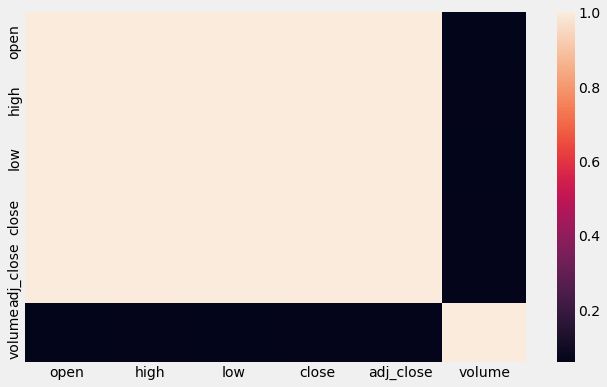

In [33]:
sns.heatmap(df.corr())
plt.show()

## Seasonal Trends

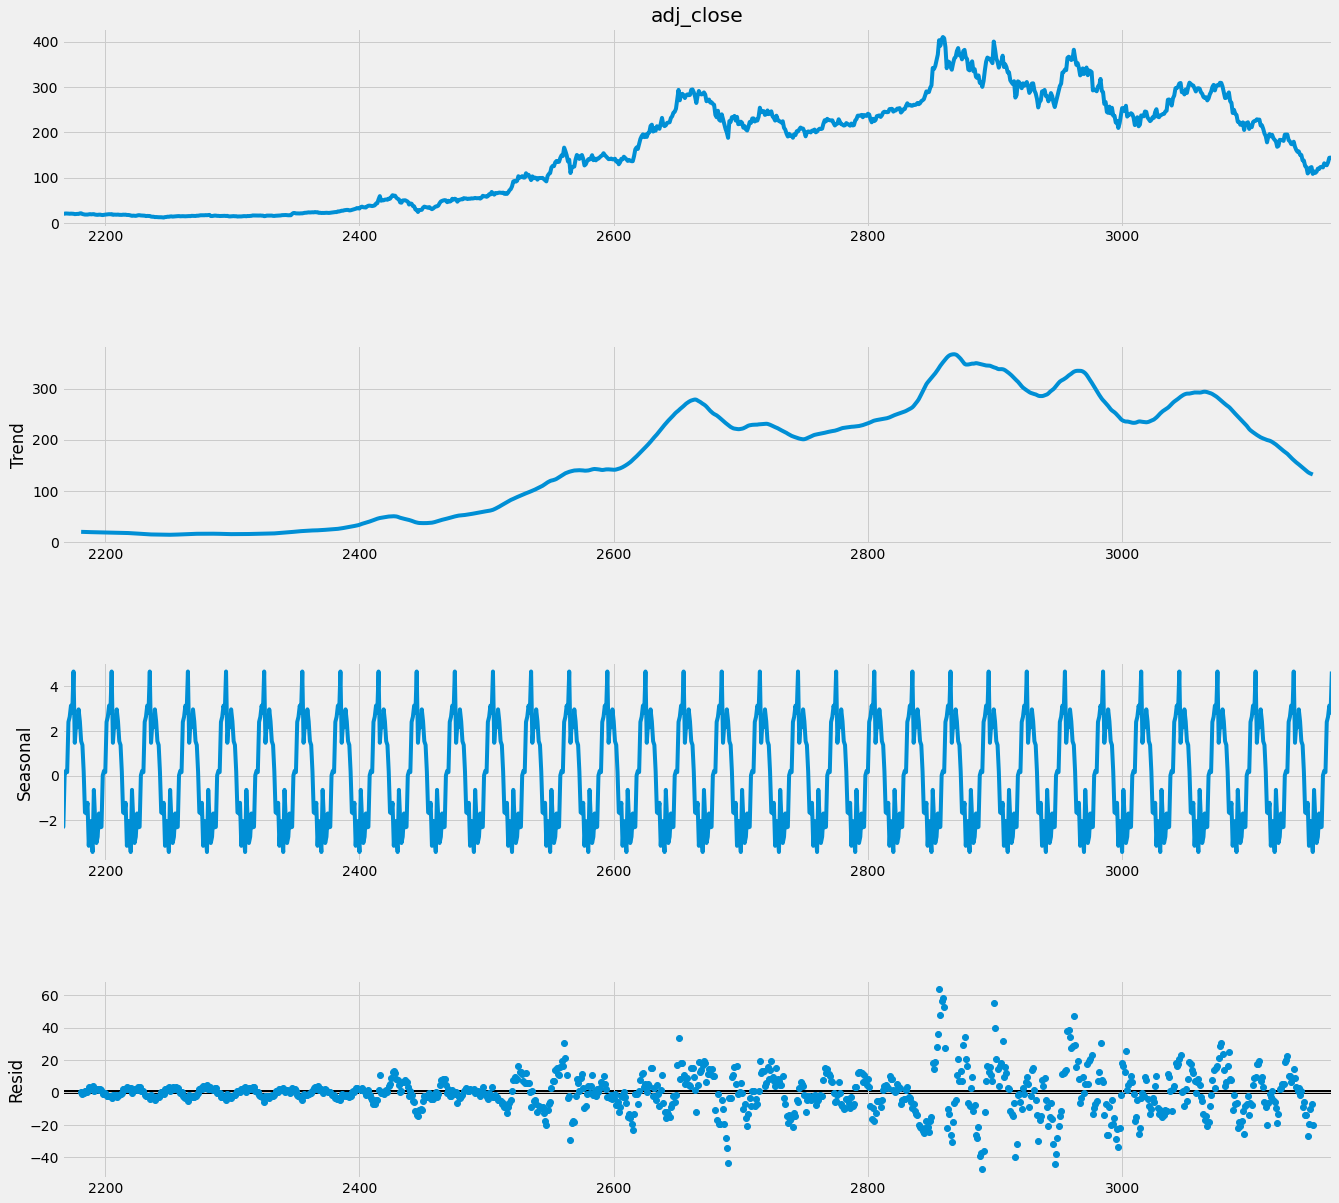

In [35]:
# Last n days visualized
n = 1000
result_data = seasonal_decompose(
    df.adj_close.tail(n),
    model='additive',
    period=30
)

fig = go.Figure()
fig = result_data.plot()
fig.set_size_inches(20, 19)

## Save dataframe

In [39]:
df.to_csv('../static/datasets/preprocessed_tsla.csv', index=False)
df.shape

(3166, 7)

In [38]:
df.head()

,date,open,high,low,close,adj_close,volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
